In [153]:
import pandas as pd
import random as rd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [154]:
apps_with_duplicates =  pd.read_csv("googleplaystore.csv")
apps_with_duplicates = apps_with_duplicates.drop(10472)
print(apps_with_duplicates.shape)
apps  = apps_with_duplicates.drop_duplicates()
print(apps.shape)
print(apps.sample(n=5))


(10840, 13)
(10357, 13)
                                                App            Category  \
16     Photo Designer - Write your name with shapes      ART_AND_DESIGN   
6854                         Bacterial Vaginosis 🇺🇸  HEALTH_AND_FITNESS   
10339                      Theme for Galaxy Note FE     PERSONALIZATION   
6752                              Sleeping Delivery              FAMILY   
7079                                    Filmi Gaane              FAMILY   

       Rating Reviews                Size  Installs  Type Price  \
16        4.7    3632                5.5M  500,000+  Free     0   
6854      NaN       1                3.5M      500+  Free     0   
10339     NaN       3                9.2M      100+  Free     0   
6752      4.6   19640                 67M  100,000+  Free     0   
7079      4.4     572  Varies with device  100,000+  Free     0   

      Content Rating            Genres      Last Updated         Current Ver  \
16          Everyone      Art & Design    

In [155]:
chars = ["+", ",", "$"]
cols = [apps_with_duplicates["Installs"], apps_with_duplicates["Price"]]
for col in cols:
    for char in chars:
        # s = col.str.find(char)
        # if s.all():
            apps["Installs"] = apps["Installs"].str.replace(f"{char}", "",regex=True)
            apps["Price"] = apps["Price"].str.replace(f"{char}", "",regex=True)
print(apps["Installs"])
print(apps["Price"])

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10836        5000
10837         100
10838        1000
10839        1000
10840    10000000
Name: Installs, Length: 10357, dtype: object
0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10357, dtype: object


In [156]:
apps['Installs'] = apps['Installs'].astype(float)
apps['Price'] = pd.to_numeric(apps['Price'], errors="raise")
print(apps["Installs"].dtype)
print(apps["Price"].dtype)

float64
float64


['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']
Number of categories =  33


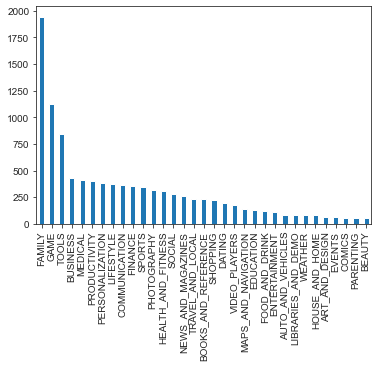

In [157]:
num_categories = apps.Category.unique()
print(num_categories)
num_apps_in_category = apps["Category"].value_counts(sort=True)

num_len_categories = len(apps.Category.unique())
print('Number of categories = ', num_len_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps["Category"].value_counts(sort=True)
num_apps_in_category.plot(x="Category", kind="bar")
plt.show()


Average app rating =  4.187876743139902


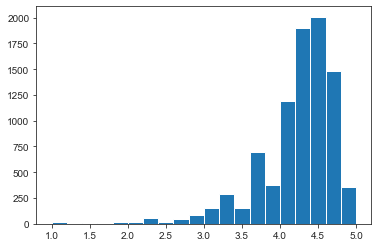

In [158]:
avg_app_rating = apps["Rating"].mean()
print('Average app rating = ', avg_app_rating)

plt.hist(apps["Rating"], bins=20)
plt.show()


,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


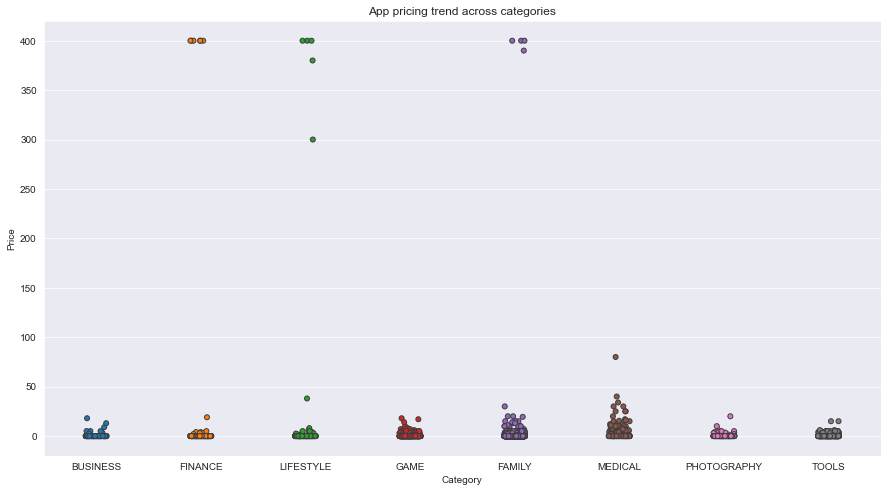

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_app_cats = apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

# Examine the price trend by plotting Price vs Category
ax = sns.stripplot(x = popular_app_cats["Category"], y = popular_app_cats["Price"], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = apps[apps.Price > 200]
apps_above_200[['Category', 'App', 'Price']]

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

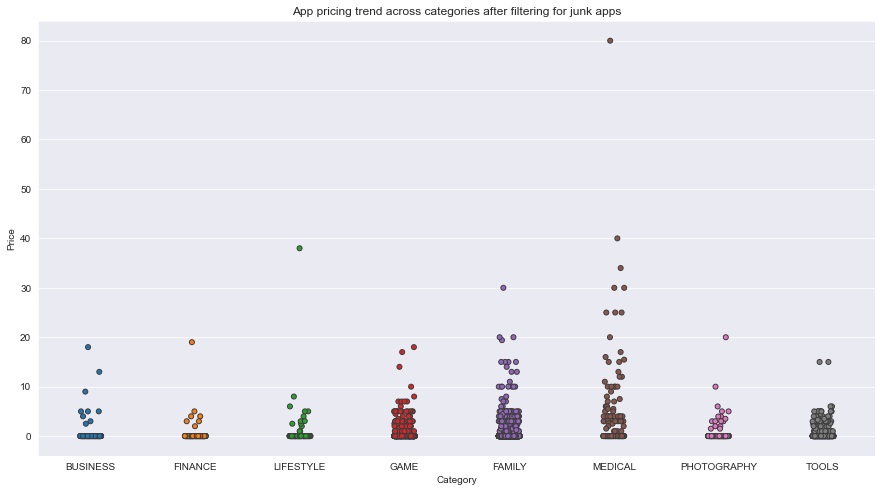

In [ ]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats.Price < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = apps_under_100["Category"], y = apps_under_100["Price"], data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

In [ ]:
import plotly
# plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == "Paid"]['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == "Free"]['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

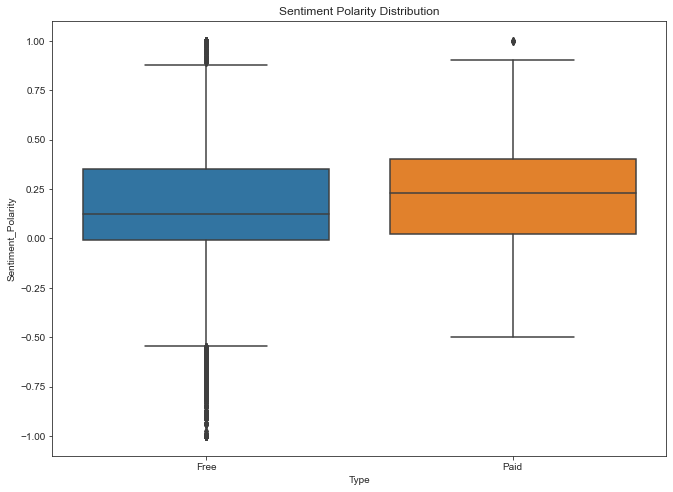

In [ ]:
# Load user_reviews.csv
reviews_df = pd.read_csv("user_reviews.csv")

# Join the two dataframes
merged_df = pd.merge(apps, reviews_df)

# # Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = merged_df["Type"], y = merged_df["Sentiment_Polarity"], data = merged_df)
ax.set_title('Sentiment Polarity Distribution')